# Actividad

- **Nombre**: 
- **Matrícula**: 

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

In [17]:
# Carga las librerías y datos
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se cargó el archivo: "{name}" con una longitud de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

import numpy as np
import pandas as pd
# Matplotlib lo utilizamos con el acrónimo plt
import matplotlib.pyplot as plt
# Seaborn lo utilizamos con el acrónimo sns
import seaborn as sns
import io

df = pd.read_csv(io.StringIO(uploaded['auto-mpg.csv'].decode('utf-8')))
df.head()

Saving auto-mpg.csv to auto-mpg (2).csv
Se cargó el archivo: "auto-mpg.csv" con una longitud de 13216 bytes


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


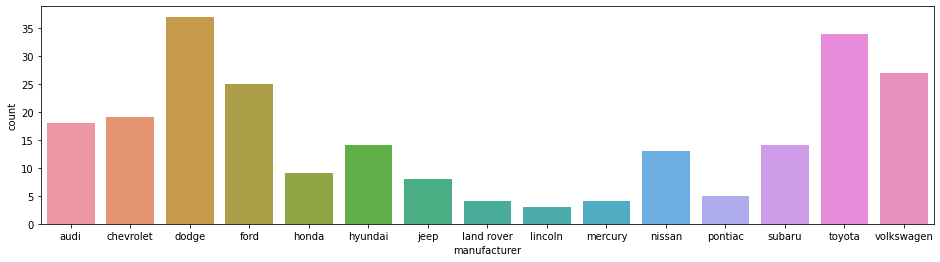

In [19]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.
df['manufacturer'].value_counts()
df.head()
fig = plt.figure(figsize=(16,4))
sns.countplot(data=df, x='manufacturer')

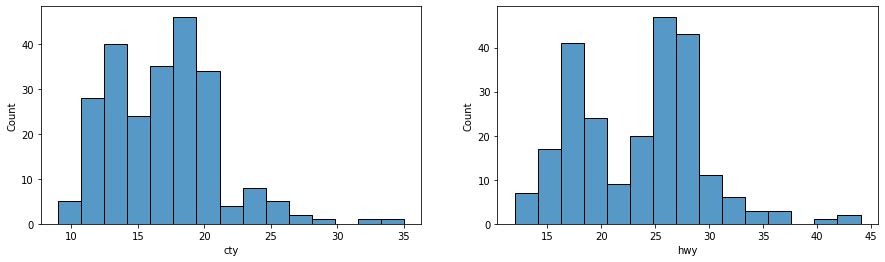

In [10]:
# Haz un histograma de las variables numéricas cty, hwy y haz una comparación en un gráfico lado a lado
fig, axs = plt.subplots(1,2, figsize=(15,4))

sns.histplot(data=df, x='cty', bins=15, ax=axs[0])
sns.histplot(data=df, x='hwy', bins=15, ax=axs[1])


In [ ]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.


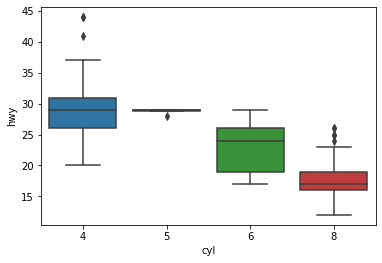

In [11]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?
sns.boxplot(data=df, y='hwy', x='cyl')

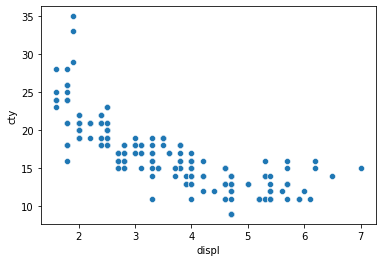

In [12]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?
sns.scatterplot(data=df, x='displ', y='cty')

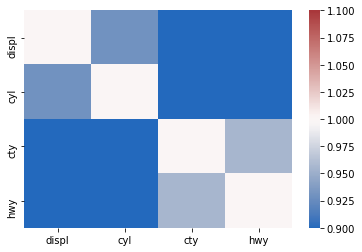

In [30]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)
matriz_corr = df.drop('year', axis=1).corr()
matriz_corr
# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE
sns.heatmap(matriz_corr, vmin=1, vmax=1, cmap='vlag')



In [31]:
matriz_corr = df.drop('year', axis=1).corr()
matriz_corr

,displ,cyl,cty,hwy
displ,1.000000,0.930227,-0.798524,-0.766020
cyl,0.930227,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.805771,1.000000,0.955916
hwy,-0.766020,-0.761912,0.955916,1.000000


In [ ]:
# ¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?
displ - cyl
cty - hwy
dipl - cty
disp - hwy
cty - cyl

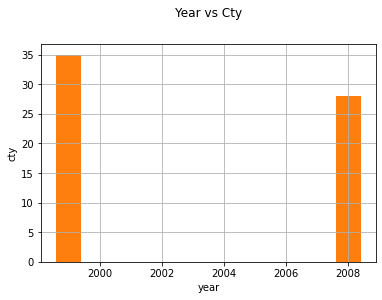

In [28]:
# ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento promedio y grafica los resultados.


result = df.groupby('year').mean()

plt.bar(result.index, result['cty'])

plt.bar(df['year'], df['cty'])
plt.xlabel('year')
plt.ylabel('cty')

plt.title('Year vs Cty', y=1.1)
plt.grid()
plt.show()